In [25]:
## Name of file: Lamoureux_IST652_Project.py
# Date Created: May 8, 2020
# Created by: Laura Lamoureux
# Purpose of Project: to answer some data questions related to book data from GoodReads

# To see all the results run this code at the begining of work
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')


In [26]:
# Import libraries
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import isbnlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from pylab import plot, show


In [27]:
# Read in JSON file from Github: https://github.com/BahramJannesar/GoodreadsBookDataset/tree/master/dataset
# This dataset was collected last month
bookDF = pd.read_json('book1-100k.json')

# Display number of rows and columns
print("This dataframe has {} rows".format(bookDF.shape[0]))
print("This dataframe has {} columns".format(bookDF.shape[1]))


This dataframe has 58292 rows
This dataframe has 18 columns


In [28]:
# Show the first 5 rows/all columns of data
bookDF.head() 


,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,None,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,None,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [29]:
# Summary of the dataset
print(bookDF.describe()) 


                 Id   pagesNumber  PublishMonth    PublishDay  CountsOfReview  \
count  58292.000000  58292.000000  58292.000000  58292.000000    58292.000000   
mean   49630.214712    293.918428     10.195104      6.404309      147.798583   
std    29222.822866    247.791794     10.313828      3.572081     1247.890971   
min        1.000000      0.000000      1.000000      1.000000        0.000000   
25%    24615.750000    168.000000      1.000000      3.000000        0.000000   
50%    48797.500000    256.000000      6.000000      6.000000        4.000000   
75%    76017.250000    368.000000     18.000000     10.000000       32.000000   
max    99999.000000  23931.000000     31.000000     12.000000    94850.000000   

        PublishYear        Rating  
count  58292.000000  58292.000000  
mean    1999.543831      3.660090  
std       11.858423      1.010905  
min      162.000000      0.000000  
25%     1997.000000      3.630000  
50%     2002.000000      3.900000  
75%     2005.00000

In [30]:
# Limiting books to those labeled as english
is_lang_eng = bookDF['Language']=='eng'

eng_bookDF = bookDF[is_lang_eng]

# Display number of rows and columns
print("This dataframe has {} rows".format(eng_bookDF.shape[0]))
print("This dataframe has {} columns".format(eng_bookDF.shape[1]))


This dataframe has 15988 rows
This dataframe has 18 columns


In [31]:
# Display first 5 rows
eng_bookDF.head()


,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,None,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,None,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [32]:
# Display column names and datatypes for those columns
eng_bookDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15988 entries, 0 to 58281
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               15988 non-null  int64  
 1   Name             15988 non-null  object 
 2   RatingDist1      15988 non-null  object 
 3   pagesNumber      15988 non-null  int64  
 4   RatingDist4      15988 non-null  object 
 5   RatingDistTotal  15988 non-null  object 
 6   PublishMonth     15988 non-null  int64  
 7   PublishDay       15988 non-null  int64  
 8   Publisher        15843 non-null  object 
 9   CountsOfReview   15988 non-null  int64  
 10  PublishYear      15988 non-null  int64  
 11  Language         15988 non-null  object 
 12  Authors          15988 non-null  object 
 13  Rating           15988 non-null  float64
 14  RatingDist2      15988 non-null  object 
 15  RatingDist5      15988 non-null  object 
 16  ISBN             15722 non-null  object 
 17  RatingDist3 

In [33]:
# Split RatingDist1 column into just the count column
countRating1 = eng_bookDF['RatingDist1'].str.split(":", n=1, expand = True)

# Creating a column for the counts for Rating 1
eng_bookDF['Rating1Count'] = countRating1[1]

# Split RatingDist2 column into just the count column
countRating2 = eng_bookDF['RatingDist2'].str.split(":", n=1, expand = True)

# Creating a column for the counts for Rating 2
eng_bookDF['Rating2Count'] = countRating2[1]

# Split RatingDist3 column into just the count column
countRating3 = eng_bookDF['RatingDist3'].str.split(":", n=1, expand = True)

# Creating a column for the counts for Rating 3
eng_bookDF['Rating3Count'] = countRating3[1]

# Split RatingDist4 column into just the count column
countRating4 = eng_bookDF['RatingDist4'].str.split(":", n=1, expand = True)

# Creating a column for the counts for Rating 4
eng_bookDF['Rating4Count'] = countRating4[1]

# Split RatingDist5 column into just the count column
countRating5 = eng_bookDF['RatingDist5'].str.split(":", n=1, expand = True)

# Creating a column for the counts for Rating 5
eng_bookDF['Rating5Count'] = countRating5[1]

# Split RatingDistTotal column into just the count column
countRatingTotal = eng_bookDF['RatingDistTotal'].str.split(":", n=1, expand = True)

# Creating a column for the counts for Rating Total
eng_bookDF['RatingTotal'] = countRatingTotal[1]

# Remove columns that are not going to be used
eng_bookDF = eng_bookDF.drop(columns=['PublishMonth', 'ISBN', 'Publisher','RatingDist1', 'RatingDist2',
                                            'RatingDist3','RatingDist4','RatingDist5','RatingDistTotal'], axis = 1)

# Rename "PublishDay" to "PublishMonth"
eng_bookDF = eng_bookDF.rename(columns={'PublishDay': 'PublishMonth'})

# Convert some attributes to numeric
eng_bookDF['Rating1Count'] = pd.to_numeric(eng_bookDF['Rating1Count'])
eng_bookDF['Rating2Count'] = pd.to_numeric(eng_bookDF['Rating2Count'])
eng_bookDF['Rating3Count'] = pd.to_numeric(eng_bookDF['Rating3Count'])
eng_bookDF['Rating4Count'] = pd.to_numeric(eng_bookDF['Rating4Count'])
eng_bookDF['Rating5Count'] = pd.to_numeric(eng_bookDF['Rating5Count'])
eng_bookDF['RatingTotal'] = pd.to_numeric(eng_bookDF['RatingTotal'])

# Display column names and datatypes for those columns
eng_bookDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15988 entries, 0 to 58281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              15988 non-null  int64  
 1   Name            15988 non-null  object 
 2   pagesNumber     15988 non-null  int64  
 3   PublishMonth    15988 non-null  int64  
 4   CountsOfReview  15988 non-null  int64  
 5   PublishYear     15988 non-null  int64  
 6   Language        15988 non-null  object 
 7   Authors         15988 non-null  object 
 8   Rating          15988 non-null  float64
 9   Rating1Count    15988 non-null  int64  
 10  Rating2Count    15988 non-null  int64  
 11  Rating3Count    15988 non-null  int64  
 12  Rating4Count    15988 non-null  int64  
 13  Rating5Count    15988 non-null  int64  
 14  RatingTotal     15988 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 2.0+ MB


In [34]:
# Look for any null values
eng_bookDF.isnull().any().sum() # how many columns
eng_bookDF.isnull().any() # names of columns


0

Id                False
Name              False
pagesNumber       False
PublishMonth      False
CountsOfReview    False
PublishYear       False
Language          False
Authors           False
Rating            False
Rating1Count      False
Rating2Count      False
Rating3Count      False
Rating4Count      False
Rating5Count      False
RatingTotal       False
dtype: bool

In [35]:
# Calculate the percentage of star ratings to total ratings
percentage1 = round(eng_bookDF['Rating1Count'].sum() / eng_bookDF['RatingTotal'].sum(), 2)
print('Percent of 1 Star Ratings to Total Rating Counts: '+str(percentage1)+'%')

percentage2 = round(eng_bookDF['Rating2Count'].sum() / eng_bookDF['RatingTotal'].sum(), 2)
print('Percent of 2 Star Ratings to Total Rating Counts: '+str(percentage2)+'%')

percentage3 = round(eng_bookDF['Rating3Count'].sum() / eng_bookDF['RatingTotal'].sum(), 2)
print('Percent of 3 Star Ratings to Total Rating Counts: '+str(percentage3)+'%')

percentage4 = round(eng_bookDF['Rating4Count'].sum() / eng_bookDF['RatingTotal'].sum(), 2)
print('Percent of 4 Star Ratings to Total Rating Counts: '+str(percentage4)+'%')

percentage5 = round(eng_bookDF['Rating5Count'].sum() / eng_bookDF['RatingTotal'].sum(), 2)
print('Percent of 5 Star Ratings to Total Rating Counts: '+str(percentage5)+'%')


Percent of 1 Star Ratings to Total Rating Counts: 0.02%
Percent of 2 Star Ratings to Total Rating Counts: 0.05%
Percent of 3 Star Ratings to Total Rating Counts: 0.18%
Percent of 4 Star Ratings to Total Rating Counts: 0.33%
Percent of 5 Star Ratings to Total Rating Counts: 0.42%


<Figure size 720x720 with 0 Axes>

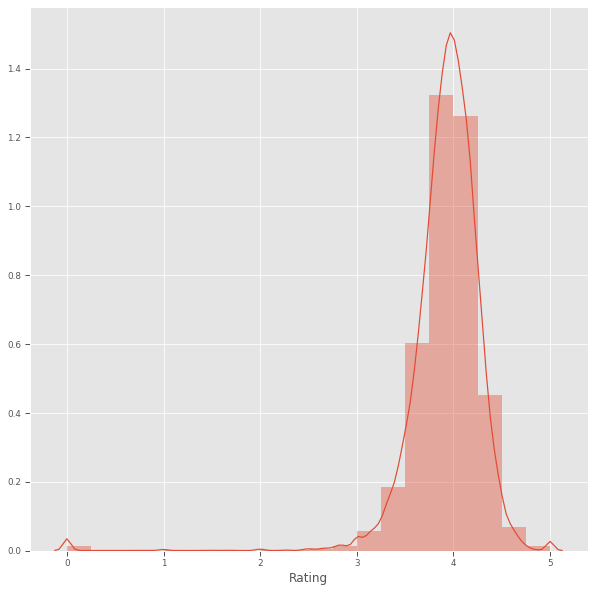

In [36]:
# Looking for the rating distribution
def segregation(ratingdata):
    values = []
    for val in ratingdata.Rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

# Plotting the rating distribution
plt.figure(figsize=(10,10))
rating1= eng_bookDF.Rating
sns.distplot(rating1, bins=20)

<Figure size 1080x720 with 0 Axes>

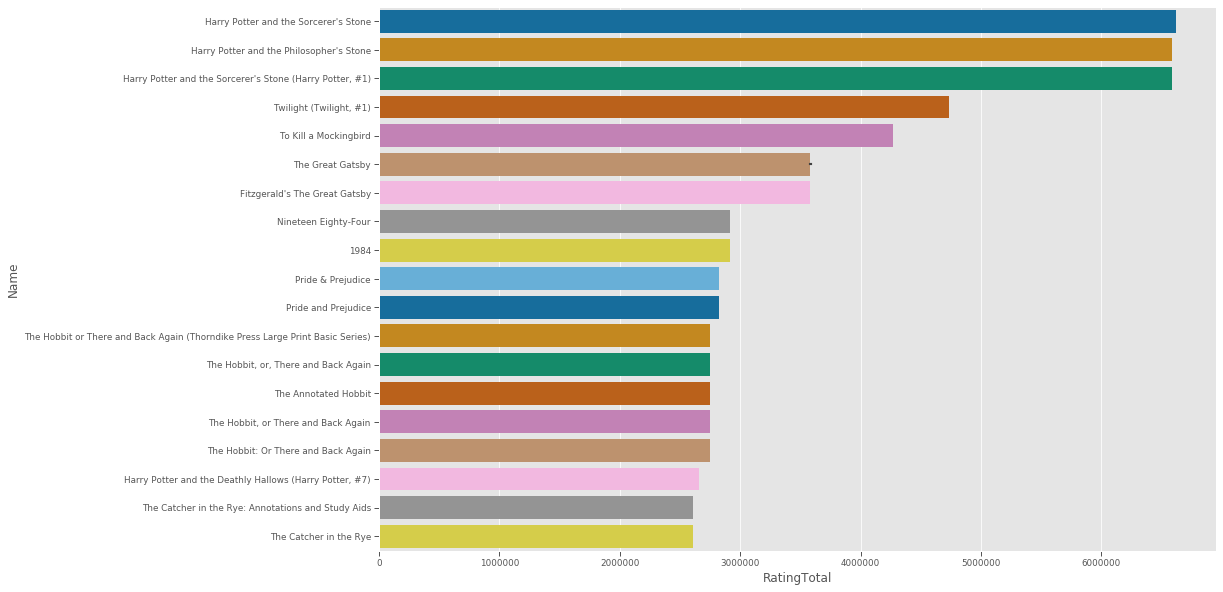

In [37]:
# Top 20 most rated books
most_rated = eng_bookDF.sort_values('RatingTotal', ascending = False).head(20).set_index('Name')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['RatingTotal'], most_rated.index, palette='colorblind')


<Figure size 1080x720 with 0 Axes>

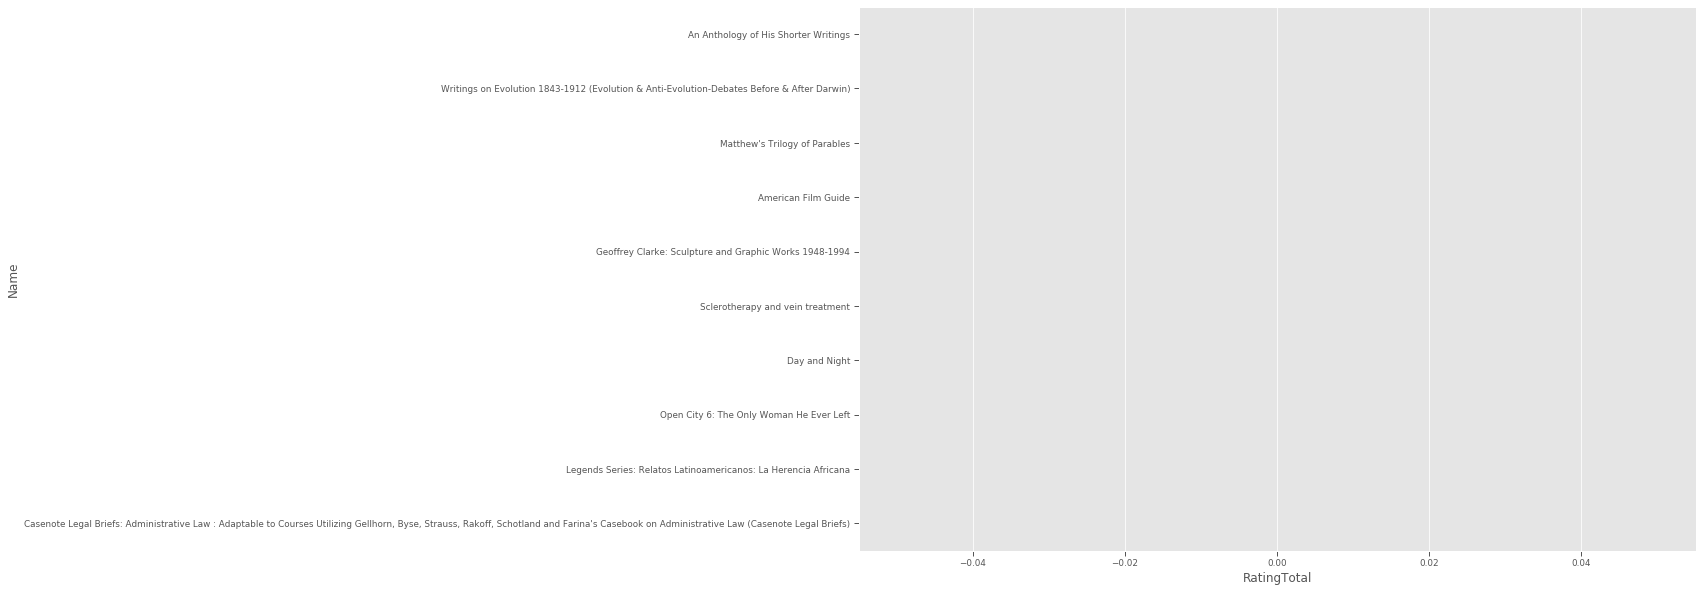

In [38]:
# 10 least rated books
most_rated = eng_bookDF.sort_values('RatingTotal', ascending = False).tail(10).set_index('Name')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['RatingTotal'], most_rated.index, palette='colorblind')


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

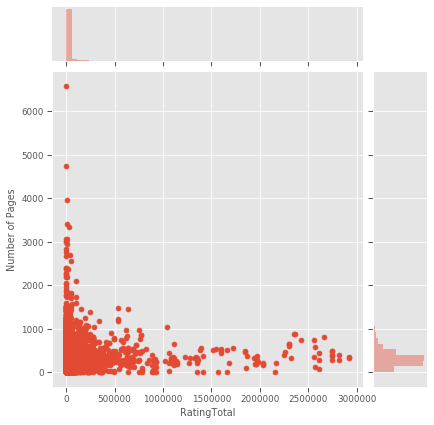

In [39]:
# Looking for relationship between number of pages and ratings
# Removing outliers
pages = eng_bookDF[~(eng_bookDF['pagesNumber']>800)]
#ratingtotal = eng_bookDF[~(eng_bookDF['RatingTotal']>3000000)]
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="RatingTotal",y='pagesNumber', kind='scatter',  
                  data= ratingtotal)
ax.set_axis_labels("RatingTotal", "Number of Pages")
plt.show()


<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Books by Rating')

Text(0, 0.5, 'Authors')

Text(14.3, 0.09999999999999998, '14.0')

Text(12.3, 1.1, '12.0')

Text(11.3, 2.1, '11.0')

Text(8.3, 3.1, '8.0')

Text(7.3, 4.1, '7.0')

Text(7.3, 5.1, '7.0')

Text(6.3, 6.1, '6.0')

Text(5.3, 7.1, '5.0')

Text(5.3, 8.1, '5.0')

Text(5.3, 9.1, '5.0')

Text(4.3, 10.1, '4.0')

Text(3.3, 11.1, '3.0')

Text(3.3, 12.1, '3.0')

Text(3.3, 13.1, '3.0')

Text(2.3, 14.1, '2.0')

Text(2.3, 15.1, '2.0')

Text(2.3, 16.1, '2.0')

Text(2.3, 17.1, '2.0')

Text(2.3, 18.1, '2.0')

Text(2.3, 19.1, '2.0')

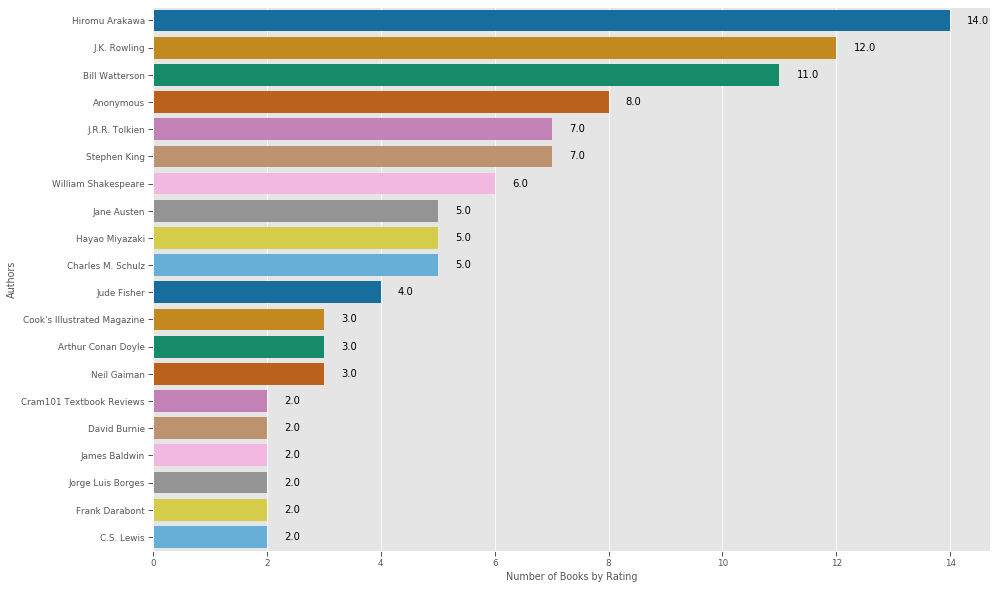

In [40]:
# Top 20 of the highest rated authors
high_rated_author = eng_bookDF[eng_bookDF['Rating']>=4.5]
high_rated_author = high_rated_author.groupby('Authors')['Name'].count().reset_index().sort_values('Name', ascending = False).head(20).set_index('Authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['Name'], high_rated_author.index, palette='colorblind')
ax.set_xlabel("Number of Books by Rating")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

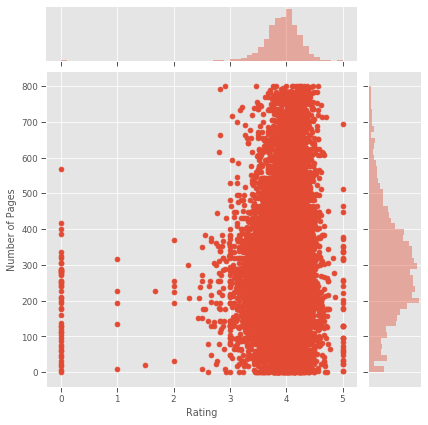

In [41]:
# Looking for relationship between number of pages and ratings
# Removing outliers
pages = eng_bookDF[~(eng_bookDF['pagesNumber']>800)]
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="Rating",y='pagesNumber', kind='scatter',  
                  data= pages)
ax.set_axis_labels("Rating", "Number of Pages")
plt.show()


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

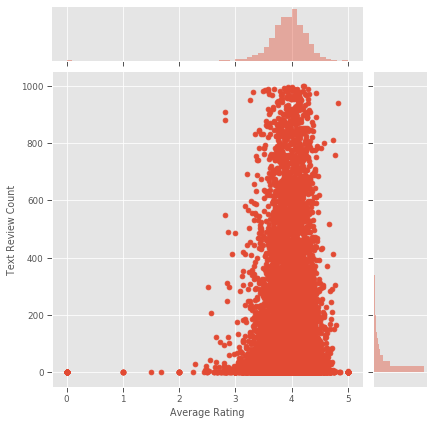

In [42]:
# Count of text reviews and average rating
# Limiting outliers
text = eng_bookDF[~(eng_bookDF['CountsOfReview']>1000)]
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="Rating",y='CountsOfReview', kind='scatter', data= text)
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()